In [1]:
import pandas as pd

df = pd.read_csv('상의데이터.csv')

def rank_to_score(rank):
    max_rank = 1
    min_rank = 4500
    score = (max_rank - rank) / (max_rank - min_rank)
    return score

df['순위'] = df['순위'].apply(rank_to_score)
list_rank = list(df['순위'])
reversed_rank = list_rank[::-1]
df['순위'] = reversed_rank

df.drop(['Unnamed: 0','url'], axis=1, inplace=True)
df

,순위,상품명,브랜드명,평점,조회수_수정,좋아요 _수정,구매후기 개수_수정,누적판매량_수정
0,1.000000,(시티보이) 오버핏 옥스포드 셔츠_SPYWD23C01,스파오,4.9,224000.0,46073,17548,50000.0
1,0.999778,[23SS Ver.][PACKAGE] 시티보이 빅오버 워싱 데님 셔츠_4 Color,라퍼지스토어,4.7,15000.0,884,3,100.0
2,0.999555,[MUSINSA EXCLUSIVE] 뉴욕 복싱 클럽 코튼 치노 셔츠 - 블랙,폴로 랄프 로렌,0.0,15000.0,314,0,100.0
3,0.999333,베이식 긴팔 티셔츠 2팩,무신사 스탠다드,4.9,141000.0,57235,31434,120000.0
4,0.999111,레이어드 크루 넥 반팔 티셔츠_일반 기장 2팩,무신사 스탠다드,4.9,87000.0,18637,14555,50000.0
...,...,...,...,...,...,...,...,...
4495,0.000889,벌룬핏 크루넥 니트 BLACK,인사일런스,4.9,2200.0,351,46,100.0
4496,0.000667,Narbe Half Shirt - Blue Grey,오프닝프로젝트,0.0,1400.0,173,0,0.0
4497,0.000445,PHYPS® MONDAY ROUTINE STITCH HOODIE BERRY PINK,피지컬 에듀케이션 디파트먼트,4.5,6200.0,924,24,100.0
4498,0.000222,차콜그레이 벌룬핏 피그먼트 다잉 후드 티셔츠 IETS3E201CG,일꼬르소,5.0,4400.0,802,61,200.0


In [2]:
df.columns = ['순위','상품명','브랜드명','평점','조회수','좋아요 수','구매후기 수','누적판매량']
df

,순위,상품명,브랜드명,평점,조회수,좋아요 수,구매후기 수,누적판매량
0,1.000000,(시티보이) 오버핏 옥스포드 셔츠_SPYWD23C01,스파오,4.9,224000.0,46073,17548,50000.0
1,0.999778,[23SS Ver.][PACKAGE] 시티보이 빅오버 워싱 데님 셔츠_4 Color,라퍼지스토어,4.7,15000.0,884,3,100.0
2,0.999555,[MUSINSA EXCLUSIVE] 뉴욕 복싱 클럽 코튼 치노 셔츠 - 블랙,폴로 랄프 로렌,0.0,15000.0,314,0,100.0
3,0.999333,베이식 긴팔 티셔츠 2팩,무신사 스탠다드,4.9,141000.0,57235,31434,120000.0
4,0.999111,레이어드 크루 넥 반팔 티셔츠_일반 기장 2팩,무신사 스탠다드,4.9,87000.0,18637,14555,50000.0
...,...,...,...,...,...,...,...,...
4495,0.000889,벌룬핏 크루넥 니트 BLACK,인사일런스,4.9,2200.0,351,46,100.0
4496,0.000667,Narbe Half Shirt - Blue Grey,오프닝프로젝트,0.0,1400.0,173,0,0.0
4497,0.000445,PHYPS® MONDAY ROUTINE STITCH HOODIE BERRY PINK,피지컬 에듀케이션 디파트먼트,4.5,6200.0,924,24,100.0
4498,0.000222,차콜그레이 벌룬핏 피그먼트 다잉 후드 티셔츠 IETS3E201CG,일꼬르소,5.0,4400.0,802,61,200.0


In [3]:
df.to_csv('상의데이터_최종.csv')

# 종속변수 = '순위'

In [4]:
X = df[['평점', '조회수', '누적판매량', '구매후기 수','좋아요 수']]
y = df['순위']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print('MSE',mse)
print('R-squared', r2)

MSE 0.07914163023745659
R-squared 0.08270043376368441


In [6]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df_corr = df.corr()
df_corr

,순위,평점,조회수,좋아요 수,구매후기 수,누적판매량
순위,1.000000,0.078322,0.278176,0.246272,0.195065,0.212576
평점,0.078322,1.000000,0.155514,0.159144,0.097913,0.097146
조회수,0.278176,0.155514,1.000000,0.643187,0.445807,0.622690
좋아요 수,0.246272,0.159144,0.643187,1.000000,0.697404,0.729512
구매후기 수,0.195065,0.097913,0.445807,0.697404,1.000000,0.768947
누적판매량,0.212576,0.097146,0.622690,0.729512,0.768947,1.000000


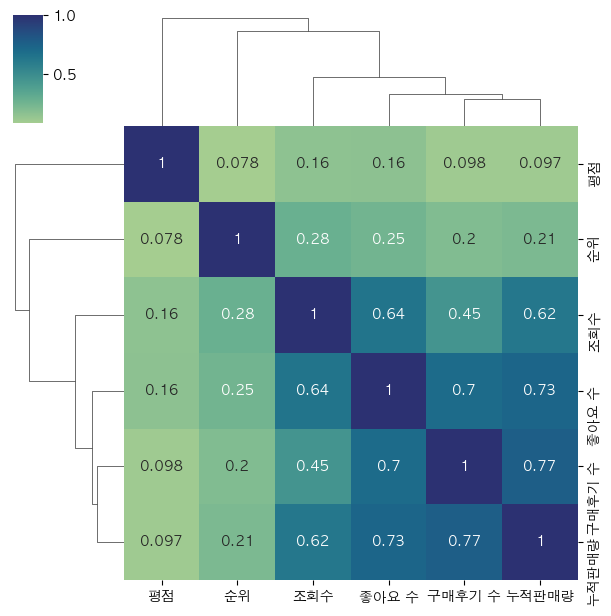

In [9]:
# 상관계수 그래프
import seaborn as sns
from matplotlib import rc
rc('font', family = 'AppleGothic')

fig = sns.clustermap(df_corr,
              annot = True,
              cmap = 'crest',)
fig.fig.set_size_inches(6,6)

# 종속변수 = '누적판매량'

In [6]:
X = df[['평점', '조회수', '구매후기 수','좋아요 수']]
y = df['누적판매량']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print('MSE',mse)
print('R-squared', r2)

MSE 6182800.327133722
R-squared 0.73182028276286


In [10]:
df = df.drop('순위', axis=1)

In [11]:
df_corr = df.corr()
df_corr

,평점,조회수,좋아요 수,구매후기 수,누적판매량
평점,1.000000,0.155514,0.159144,0.097913,0.097146
조회수,0.155514,1.000000,0.643187,0.445807,0.622690
좋아요 수,0.159144,0.643187,1.000000,0.697404,0.729512
구매후기 수,0.097913,0.445807,0.697404,1.000000,0.768947
누적판매량,0.097146,0.622690,0.729512,0.768947,1.000000


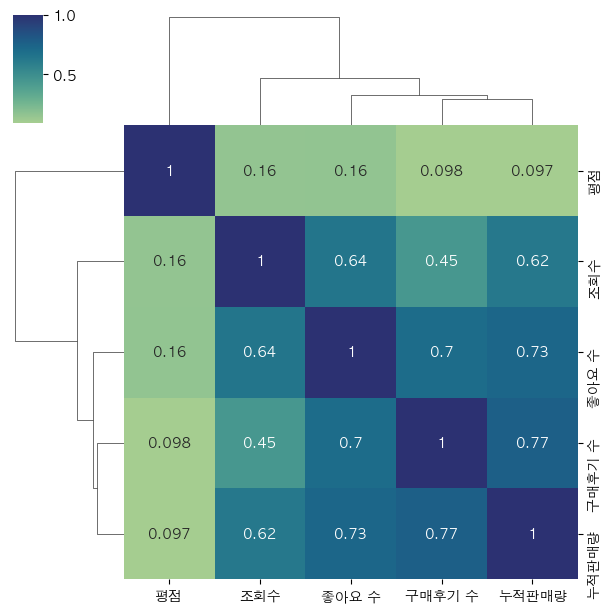

In [12]:
# 상관계수 그래프
import seaborn as sns
from matplotlib import rc
rc('font', family = 'AppleGothic')

fig = sns.clustermap(df_corr,
              annot = True,
              cmap = 'crest',)
fig.fig.set_size_inches(6,6)

# 토픽모델링

In [15]:
#자연어 처리
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package punkt to /Users/whan_i/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/whan_i/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# 전처리 함수 정의
def preprocess(text):
    # 소문자 변환
    text = text.lower()
    # 특수 문자 제거
    text = text.translate(str.maketrans("", "", string.punctuation))
    # 불용어 제거
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # 어간 추출
    stemmer = nltk.stem.PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    # 토큰 합치기
    text = " ".join(stemmed_tokens)
    return text

# '상품명'과 '브랜드명' 열에 적용
df['상품명'] = df['상품명'].apply(preprocess)
df['브랜드명'] = df['브랜드명'].apply(preprocess)
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# 이 코드는 10개의 토픽을 추출하고, 각 토픽별로 가장 관련성이 높은 단어 10개를 출력합니다. 이를 바탕으로 문서의 주제를 파악할 수 있습니다.

# 상품명과 브랜드명을 하나의 문서로 합치기
docs = df['상품명'] + ' ' + df['브랜드명']

# TfidfVectorizer를 사용하여 문서에서 단어의 출현 빈도를 벡터화
tfidf = TfidfVectorizer(stop_words='english')
doc_vectors = tfidf.fit_transform(docs)

# LatentDirichletAllocation를 사용하여 토픽 모델링 수행
num_topics = 10 # 추출할 토픽의 수
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(doc_vectors)

# 토픽별로 가장 관련성이 높은 단어 10개 출력
feature_names = tfidf.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-11:-1]]))

Topic #0:
하프 니트 셔츠 카라 블랙 color 수아레 피그먼트 집업 hoodi
Topic #1:
커버낫 로고 맨투맨 티셔츠 어센틱 mmlg 블랙 엠엠엘지 후디 네이비
Topic #2:
코드그라피 로고 cgp set 아치 하프집업 럭비 선택 리트리버클럽 예스아이씨
Topic #3:
아웃스탠딩 hoodi 데님 디파트먼트 phyps 에듀케이션 피지컬 디스이즈네버댓 워싱 셔츠
Topic #4:
shirt 티셔츠 하프 에센셜 집업 오버핏 유니온블루 laundri denim black
Topic #5:
arch hoodi 예일 black logo 23ss 트위치 tone tshirt small
Topic #6:
와릿이즌 logo 아디다스 classic knit 마리떼 엔젤 블랙 sweatshirt half
Topic #7:
폴로 랄프 로렌 셔츠 슬림핏 블루 저지 long sleev 스웨터
Topic #8:
오버핏 dan 예일 crewneck univ 필루미네이트 니트 black sweatshirt navi
Topic #9:
스탠다드 무신사 크루 티셔츠 오버사이즈 긴팔 블랙 반팔 니트 스웨트셔츠
